<a href="https://colab.research.google.com/github/k4404c/tensorflow_workbook/blob/main/SkimLit_NLPproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check what files are in the PubMed_20K dataset
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 30.73 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT
dev.txt  test.txt  train.txt


['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
def get_lines(filename):
  with open(filename , 'r') as f:
    return f.readlines()


In [ ]:
train_lines = get_lines(data_dir + "train.txt")

In [ ]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
#data preprocessing
#[{
#    'line_number:0,
#    'target': "BACKROUND",
#    'text':"bla asdad wds ",
#    'total_lines': 12
#    }]


def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith('###'): #checks new abstract
      abstract_id = line
      abstract_lines = ""
    elif line.isspace(): #checks new line
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_num, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split('\t')
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1]
        line_data["line_number"] = abstract_line_num
        line_data["total_lines"] = len(abstract_line_split)-1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

In [ ]:
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_samples[:15]

[{'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'Secondary outcome measures included the Western Ontari

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,A total of @ patients with primary knee OA wer...,1,11
2,METHODS,Outcome measures included pain reduction and i...,2,11
3,METHODS,Pain was assessed using the visual analog pain...,3,11
4,METHODS,Secondary outcome measures included the Wester...,4,11


In [ ]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

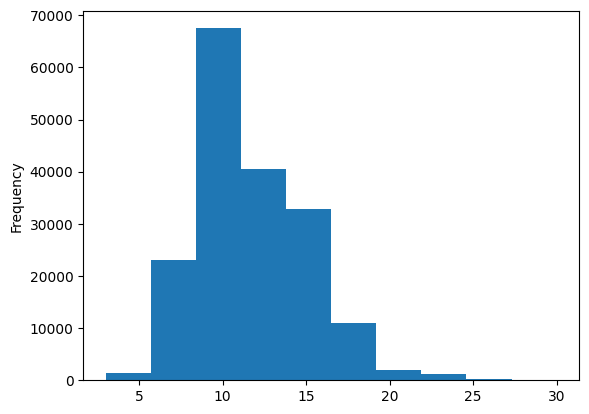

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
#one hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
#Extract Labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
#get class names and num classes from label endoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
#Model 0, baseline, Multinomial Naive Bayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X = train_sentences,
            y = train_labels_encoded)


Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X = val_sentences,
                 y = val_labels_encoded)

0.7218323844829869

In [ ]:
#Make predictions
baseline_preds = model_0.predict(val_sentences)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import calculate_results

--2024-05-29 21:25:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-29 21:25:50 (71.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
baseline_results = calculate_results(y_true = val_labels_encoded,
                                     y_pred = baseline_preds)

baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
#Preparing data for deep sequence models
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

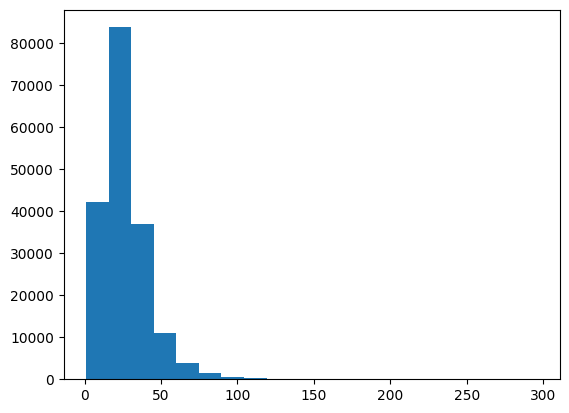

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sent_lens, bins = 20)

In [ ]:
#how long of a sentence length convers 95% of examples
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
max(sent_lens)

296

In [ ]:
#Create text vectorizer
max_tokens = 68000

from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens,
                                    output_sequence_length = output_seq_len)

In [ ]:
#Adapt to train data
text_vectorizer.adapt(train_sentences)

In [ ]:
#Test on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"text : {target_sentence}")
print(f"len of text : {len(target_sentence.split())}")
print(f"vectorized text : {text_vectorizer(target_sentence)}")

text : Craving is postulated to play a significant role in relapse for both user types , yet group differences on observed scale scores have been reported without first assessing the prerequisite measurement equivalence ( invariance ) of the items , which is essential for meaningful group comparisons .
len of text : 47
vectorized text : [ 2335    20  9333     6  1889     8    37   546     5  1011    11    54
  5160  1086  1337    13   102    18   148   158   119    99   167   205
   159   152  1332     2 18119   935  4160 30612     4     2  1928   126
    20  2027    11  1846    13  1319     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [ ]:
#how many words in training vocab
rct_20k_text_vocab = text_vectorizer.get_vocabulary()

print(f"Num of words: {len(rct_20k_text_vocab)}")
print(f"Most common words: {rct_20k_text_vocab[:5]}")
print(f"Least common words: {rct_20k_text_vocab[-5:]}")

Num of words: 64841
Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
#get text vectorizer config
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
#Create embedding layer
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab),
                               output_dim = 128,
                               mask_zero = True,
                               name = "token_embedding")

print(f"len of text : {len(target_sentence.split())}")
print(f"text : {target_sentence}")
print(f"vectorized text : {text_vectorizer(target_sentence)}")
print(f"sentence after embedding: {token_embed(text_vectorizer(target_sentence))}")
print(f"sentence after embedding shape: {token_embed(text_vectorizer(target_sentence)).shape}")

len of text : 47
text : Craving is postulated to play a significant role in relapse for both user types , yet group differences on observed scale scores have been reported without first assessing the prerequisite measurement equivalence ( invariance ) of the items , which is essential for meaningful group comparisons .
vectorized text : [ 2335    20  9333     6  1889     8    37   546     5  1011    11    54
  5160  1086  1337    13   102    18   148   158   119    99   167   205
   159   152  1332     2 18119   935  4160 30612     4     2  1928   126
    20  2027    11  1846    13  1319     0     0     0     0     0     0
     0     0     0     0     0     0     0]
sentence after embedding: [[ 0.04224094  0.021603    0.03595754 ...  0.02403009 -0.01014566
  -0.04198996]
 [ 0.0045164   0.02320976  0.04479733 ...  0.04045955  0.01408846
   0.03702128]
 [ 0.01468576 -0.00064922  0.01332455 ... -0.01333513 -0.01082294
   0.04082637]
 ...
 [-0.04357738 -0.01659375  0.02331561 ... -0.039925

In [ ]:
#We are going to setup are dataset to run faster with tf.data API

train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [ ]:
#take datasets and turn them into prefetched datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
#model 1: conv1d with token embeddings

inputs = layers.Input(shape=(1,) , dtype = tf.string)
x = text_vectorizer(inputs)
x = token_embed(x)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)

model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [ ]:
his_1 = model_1.fit(train_dataset,
                    steps_per_epoch = int(0.1*len(train_dataset)),
                    epochs = 3,
                    validation_data = valid_dataset,
                    validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 93s 163ms/step - loss: 0.9321 - accuracy: 0.6291 - val_loss: 0.6901 - val_accuracy: 0.7400
Epoch 2/3
562/562 [==============================] - 86s 154ms/step - loss: 0.6621 - accuracy: 0.7534 - val_loss: 0.6328 - val_accuracy: 0.7709
Epoch 3/3
562/562 [==============================] - 84s 149ms/step - loss: 0.6188 - accuracy: 0.7736 - val_loss: 0.5954 - val_accuracy: 0.7852


In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)

model_1_results = calculate_results(y_true = val_labels_encoded, y_pred = model_1_preds)
model_1_results

945/945 [==============================] - 7s 7ms/step


{'accuracy': 78.80312458625711,
 'precision': 0.7852975776844348,
 'recall': 0.7880312458625711,
 'f1': 0.7859953226463394}

In [ ]:
#model_2 pretrained feature extractor



# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
Merck & Co. , Inc. .

Sentence after embedding:
[ 0.05897513 -0.02182718  0.02648443  0.02978606 -0.06132577 -0.0492272
 -0.02019848 -0.04433641  0.01541384 -0.08158664  0.07245678  0.05665992
  0.01547667 -0.00836284  0.03005093 -0.04564483 -0.07688645 -0.03176777
  0.01508997  0.0451537   0.07784742 -0.01098816  0.01543188 -0.01938523
  0.04065425  0.02435397 -0.0346799   0.04692557 -0.01875902  0.05370869] (truncated output)...

Length of sentence embedding:
512


In [ ]:
inputs = layers.Input(shape = [], dtype = "string")
x = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation = 'relu')(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
his_2 = model_2.fit(train_dataset,
                    steps_per_epoch = int(0.1*len(train_dataset)),
                    epochs = 3,
                    validation_data = valid_dataset,
                    validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 15s 19ms/step - loss: 0.9197 - accuracy: 0.6485 - val_loss: 0.7978 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 11s 20ms/step - loss: 0.7694 - accuracy: 0.7018 - val_loss: 0.7548 - val_accuracy: 0.7035
Epoch 3/3
562/562 [==============================] - 9s 17ms/step - loss: 0.7535 - accuracy: 0.7129 - val_loss: 0.7394 - val_accuracy: 0.7141


In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1)

model_2_results = calculate_results(y_true = val_labels_encoded, y_pred = model_2_preds)
model_2_results

945/945 [==============================] - 13s 13ms/step


{'accuracy': 71.35575268105389,
 'precision': 0.7140193918670289,
 'recall': 0.7135575268105389,
 'f1': 0.7105889023454314}

In [ ]:
#Model 3 Conv1d with character embeddings


#creating char level tokenizer
def split_chars(text):
  return " ".join(list(text))

split_chars(train_sentences[0])

'T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .'

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .',
 'A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'O u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_lens =np.mean(char_lens)
mean_char_lens

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

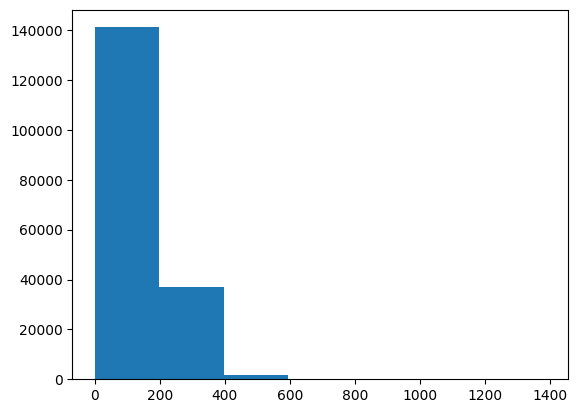

In [ ]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7)

In [ ]:
#find char length to cover 95%
output_seq_char_len = int(np.percentile(char_lens , 95))
output_seq_char_len

290

In [ ]:
#get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
NUM_CHAR_TOKENS = len(alphabet)
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    name = "char_vectorizer",
                                    standardize = "lower_and_strip_punctuation" #set to none if u want punctuation
                                    )

In [ ]:
#adapt char vectorizer
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Num chars: {len(char_vocab)}")
print(f"Most commone: {char_vocab[:5]}")
print(f"Least common: {char_vocab[-5:]}")

Num chars: 28
Most commone: ['', '[UNK]', 'e', 't', 'i']
Least common: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
T h e   c o m p a r i s o n   o f   t h e   t o t a l   s c o r e s   o f   t h e   q u a l i t y   o f   l i f e   i n d i c a t e d   a n   i n c r e a s e   i n   t h e   s c o r e s   o f   t h e   q u a l i t y   o f   l i f e   i n   t h e   i n t e r v e n t i o n   g r o u p   a f t e r   t h e   e x e r c i s e   .

Length of chars: 134

Vectorized chars:
[[ 3 13  2 11  7 15 14  5  8  4  9  7  6  7 17  3 13  2  3  7  3  5 12  9
  11  7  8  2  9  7 17  3 13  2 26 16  5 12  4  3 19  7 17 12  4 17  2  4
   6 10  4 11  5  3  2 10  5  6  4  6 11  8  2  5  9  2  4  6  3 13  2  9
  11  7  8  2  9  7 17  3 13  2 26 16  5 12  4  3 19  7 17 12  4 17  2  4
   6  3 13  2  4  6  3  2  8 21  2  6  3  4  7  6 18  8  7 16 14  5 17  3
   2  8  3 13  2  2 24  2  8 11  4  9  2  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0

In [ ]:
#Creating a char level embedding layer
char_embed = layers.Embedding(input_dim = len(char_vocab),
                              output_dim = 25,
                              mask_zero = True,
                              name = "char_embed")


In [ ]:
# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
T h e   c o m p a r i s o n   o f   t h e   t o t a l   s c o r e s   o f   t h e   q u a l i t y   o f   l i f e   i n d i c a t e d   a n   i n c r e a s e   i n   t h e   s c o r e s   o f   t h e   q u a l i t y   o f   l i f e   i n   t h e   i n t e r v e n t i o n   g r o u p   a f t e r   t h e   e x e r c i s e   .

Embedded chars (after vectorization and embedding):
[[[ 0.0353755   0.00079716 -0.00906343 ...  0.00682564 -0.00212222
   -0.03760761]
  [ 0.0349527  -0.00690395  0.0047739  ... -0.02493446 -0.00514437
    0.01686503]
  [-0.03506028  0.02560927 -0.04760426 ... -0.02129039 -0.03111767
    0.04299973]
  ...
  [ 0.0077572   0.03849597  0.03929755 ...  0.0166348   0.03582999
   -0.02471398]
  [ 0.0077572   0.03849597  0.03929755 ...  0.0166348   0.03582999
   -0.02471398]
  [ 0.0077572   0.03849597  0.03929755 ...  0.0166348   0.03582999
   -0.02471398]]]

Character embedding shape: (1, 290, 25)


In [ ]:
inputs = layers.Input(shape=(1,) , dtype = "string")
x = char_vectorizer(inputs)
x = char_embed(x)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)

model_3 = tf.keras.Model(inputs,outputs)

model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [ ]:
#Create char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
his_3 = model_3.fit(train_char_dataset,
                    steps_per_epoch = int(0.1 * len(train_char_dataset)),
                    epochs = 3,
                    validation_data = val_char_dataset,
                    validation_steps = int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 14s 24ms/step - loss: 1.2660 - accuracy: 0.4796 - val_loss: 1.0325 - val_accuracy: 0.5967
Epoch 2/3
562/562 [==============================] - 13s 23ms/step - loss: 0.9889 - accuracy: 0.6070 - val_loss: 0.9231 - val_accuracy: 0.6433
Epoch 3/3
562/562 [==============================] - 13s 24ms/step - loss: 0.9155 - accuracy: 0.6382 - val_loss: 0.8554 - val_accuracy: 0.6789


In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis = 1)

model_3_results = calculate_results(y_true = val_labels_encoded, y_pred = model_3_preds)
model_3_results

945/945 [==============================] - 7s 7ms/step


{'accuracy': 66.34449887461936,
 'precision': 0.6586997666834503,
 'recall': 0.6634449887461936,
 'f1': 0.6553131567797918}

In [ ]:
#Model 4: combining pretrained embeddings and char embeddings (hybrid)
#layers.Concatenate


#create token inputs model
token_inputs = layers.Input(shape = [], dtype = "string", name = "token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation = 'relu')(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs, outputs = token_output)

#create char inputs model
char_inputs = layers.Input(shape = (1,), dtype = "string", name = "char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs= char_inputs, outputs= char_bi_lstm)

#concatenate token and char inputs
token_char_concat = layers.Concatenate(name = "token_char_hybrid")([token_model.output,
                                                                    char_model.output])

#create output layers - adding dropout
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation = "relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation = "softmax")(final_dropout)

model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input],
                         outputs = output_layer,
                         name = "model_4")

In [ ]:
model_4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_input[0][0]']   

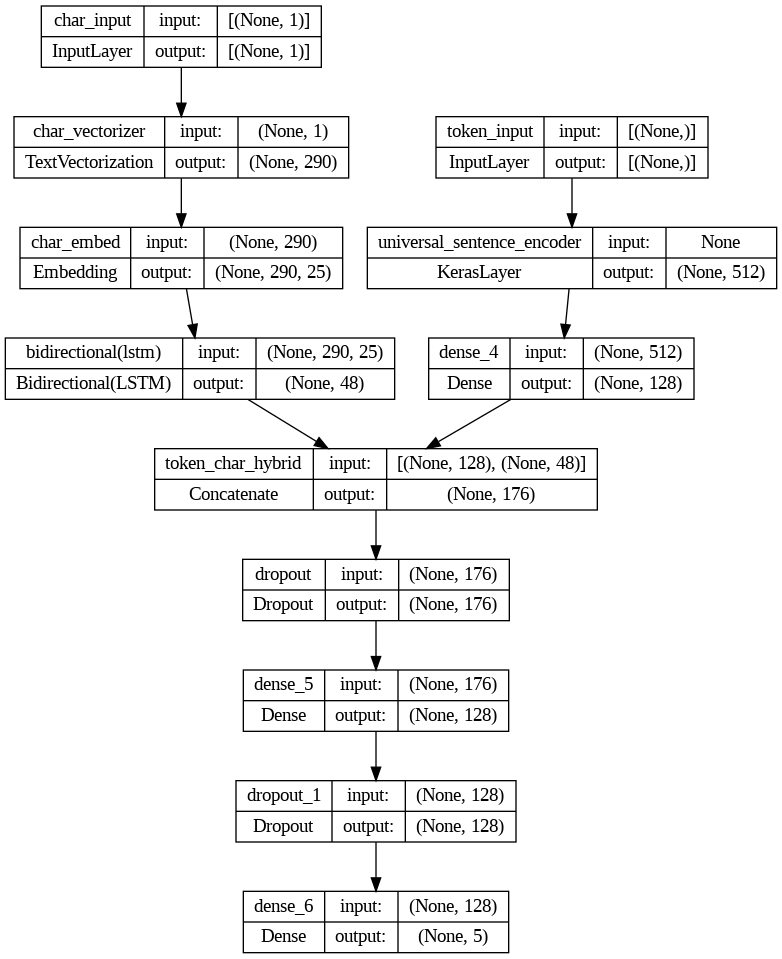

In [ ]:
#plot hybrid model
from keras.utils import plot_model
plot_model(model_4, show_shapes = True)

In [ ]:
model_4.compile(loss= "categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
#getting mult-input dataset
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) #make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) #make labels
train_char_token_dataset = tf.data.Dataset.zip((train_token_char_data, train_char_token_labels))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars)) #make data
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot) #make labels
val_char_token_dataset = tf.data.Dataset.zip((val_token_char_data, val_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
his_4 = model_4.fit(train_char_token_dataset,
                    steps_per_epoch = int(0.1*len(train_char_token_dataset)),
                    epochs = 3,
                    validation_data = val_char_token_dataset,
                    validation_steps = int(0.1* len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 203s 341ms/step - loss: 0.9794 - accuracy: 0.6117 - val_loss: 0.7770 - val_accuracy: 0.7008
Epoch 2/3
562/562 [==============================] - 192s 342ms/step - loss: 0.7961 - accuracy: 0.6896 - val_loss: 0.7090 - val_accuracy: 0.7211
Epoch 3/3
562/562 [==============================] - 197s 350ms/step - loss: 0.7710 - accuracy: 0.7055 - val_loss: 0.6904 - val_accuracy: 0.7394


In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis = 1)

model_4_results = calculate_results(y_true = val_labels_encoded, y_pred = model_4_preds)
model_4_results

945/945 [==============================] - 68s 67ms/step


{'accuracy': 73.46418641599365,
 'precision': 0.7346525841646893,
 'recall': 0.7346418641599365,
 'f1': 0.7308170154699252}

In [ ]:
#Model 5: adding positional embeddings (feature engineering)

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,A total of @ patients with primary knee OA wer...,1,11
2,METHODS,Outcome measures included pain reduction and i...,2,11
3,METHODS,Pain was assessed using the visual analog pain...,3,11
4,METHODS,Secondary outcome measures included the Wester...,4,11


In [ ]:
#create positional embeddings
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

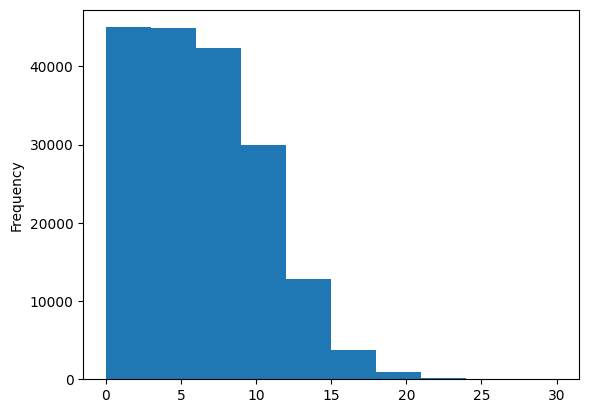

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth = 15)

train_line_numbers_one_hot[:14], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(14, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.

In [165]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)


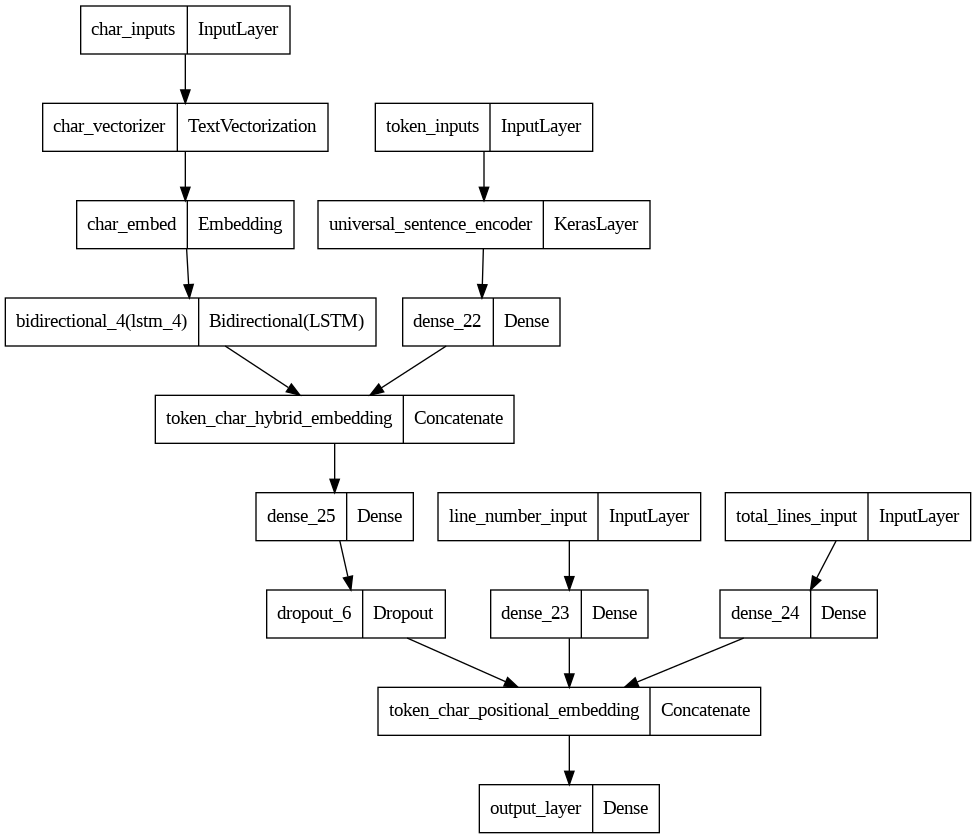

In [166]:
plot_model(model_5)

In [167]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [168]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [169]:
his_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))



Epoch 1/3
562/562 [==============================] - 283s 470ms/step - loss: 1.0941 - accuracy: 0.7223 - val_loss: 0.9809 - val_accuracy: 0.8022
Epoch 2/3
562/562 [==============================] - 210s 373ms/step - loss: 0.9646 - accuracy: 0.8162 - val_loss: 0.9492 - val_accuracy: 0.8251
Epoch 3/3
562/562 [==============================] - 202s 360ms/step - loss: 0.9492 - accuracy: 0.8234 - val_loss: 0.9384 - val_accuracy: 0.8301


In [170]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

945/945 [==============================] - 78s 78ms/step


{'accuracy': 83.42049516748312,
 'precision': 0.8328793783033269,
 'recall': 0.8342049516748312,
 'f1': 0.8331595995348005}

In [ ]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

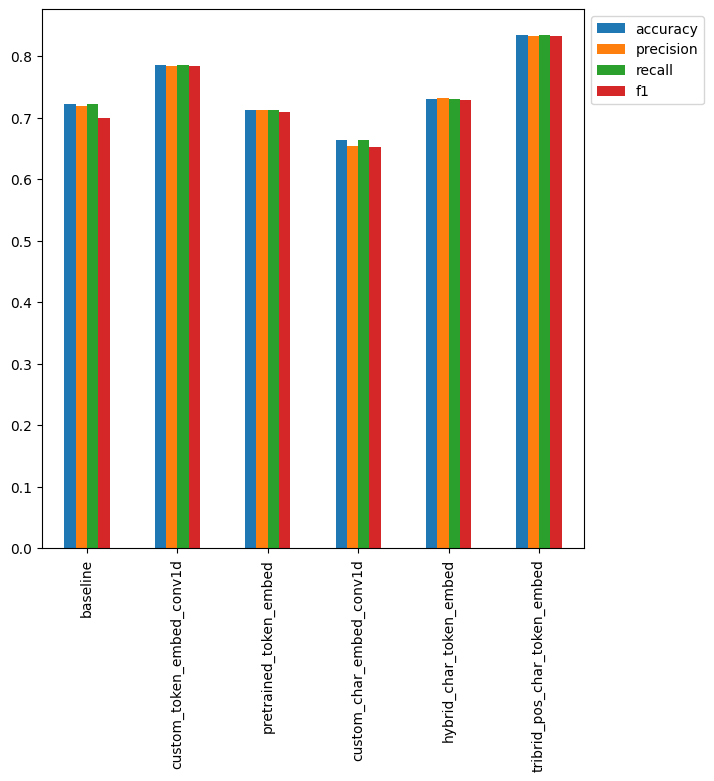

In [172]:
all_model_results.plot(kind="bar", figsize=(7, 7)).legend(bbox_to_anchor=(1.0, 1.0))

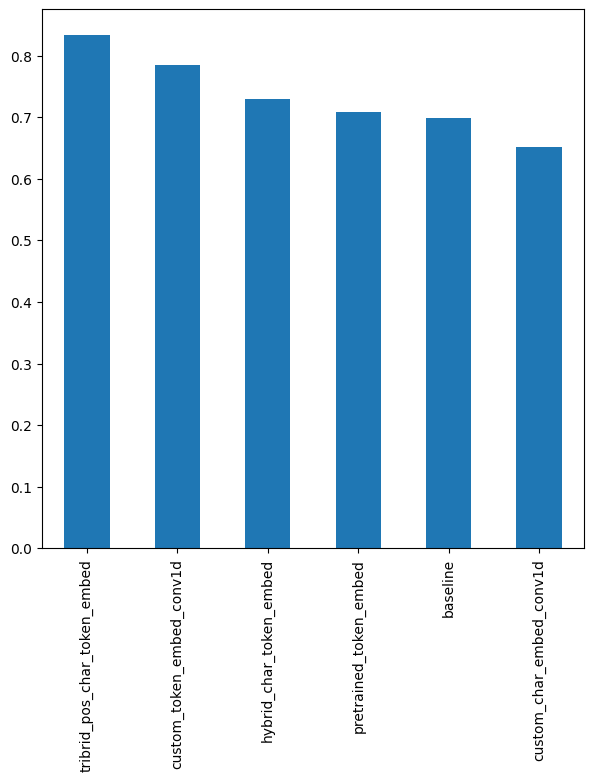

In [173]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(7, 7));

In [174]:
model_5.save("skimlit_tribrid_model") # model will be saved to path specified by string